## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp_df = pd.read_csv(
    Path('Resources/bitstamp.csv'),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)


### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp_df.head()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase_df = pd.read_csv(
    Path('Resources/coinbase.csv'),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp_df = bitstamp_df.dropna()
bitstamp_df = bitstamp_df.fillna(bitstamp_df.mean())
bitstamp_df.isnull().sum()


/Users/gilbertosanchez/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $
bitstamp_df.loc[:,'Close'] = bitstamp_df.loc[:,'Close'].astype(str).str.replace("$","")
bitstamp_df.head()



                        

/Users/gilbertosanchez/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
# Convert the Close data type to a float
bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:,"Close"].astype('float')
bitstamp_df.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary
bitstamp_df = bitstamp_df.drop_duplicates()
bitstamp_df.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [10]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase_df = coinbase_df.dropna()
coinbase_df = coinbase_df.fillna(coinbase_df.mean())
coinbase_df.isnull().sum()
coinbase_df.loc[:,'Close'] = coinbase_df.loc[:,'Close'].astype(str).str.replace("$","")
coinbase_df.loc[:, "Close"] = coinbase_df.loc[:,"Close"].astype('float')
coinbase_df.dtypes
coinbase_df = coinbase_df.drop_duplicates()
coinbase_df.head()





/Users/gilbertosanchez/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/gilbertosanchez/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [11]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp_df.iloc[:, 3]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [12]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase_df.iloc[:,3]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [13]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_df.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,10459.842453,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,2315.976088,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,5944.000000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,8613.370000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,10145.950000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,11444.810000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,17234.980000,580.646391,5.483271e+06,17227.810502


In [14]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_df.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,10449.140958,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,2317.197419,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,5882.310000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,8609.230000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,10137.440000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,11397.237500,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,17177.990000,959.084903,1.152334e+07,17177.995495


<AxesSubplot:title={'center':'Bitstamp Bitcoin'}, xlabel='Timestamp'>

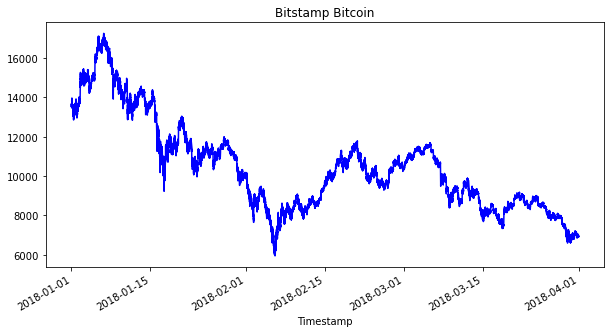

In [16]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_df['Close'].plot(figsize=(10,5), title="Bitstamp Bitcoin", color= "blue")

<AxesSubplot:title={'center':'Coinbase Bitcoin'}, xlabel='Timestamp'>

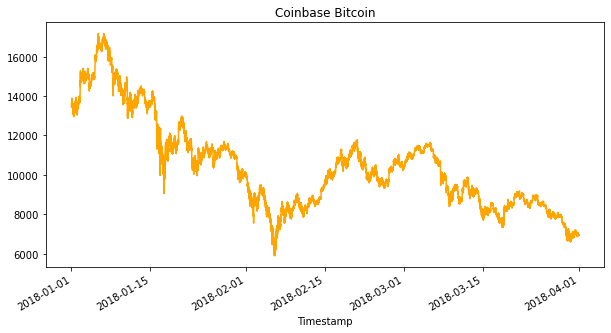

In [17]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_df['Close'].plot(figsize=(10,5),title="Coinbase Bitcoin",color="orange")

<AxesSubplot:title={'center':'Bitstamp Bitcoin vs Coinbase Bitcoin'}, xlabel='Timestamp'>

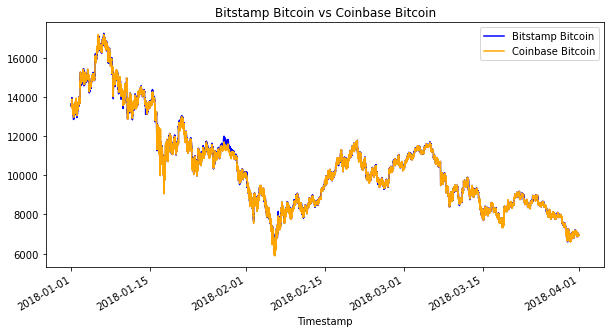

In [18]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_df['Close'].plot(legend=True , title = "Bitstamp Bitcoin vs Coinbase Bitcoin", figsize = (10,5), color="blue", label = "Bitstamp Bitcoin")
coinbase_df['Close'].plot(legend=True , figsize =(10,5), color="orange", label = "Coinbase Bitcoin")

<AxesSubplot:title={'center':'January Bitstamp Bitcoin vs Coinbase Bitcoin'}, xlabel='Timestamp'>

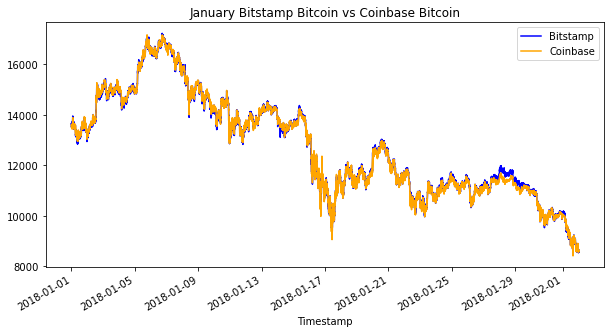

In [19]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_df['Close'].loc['2018-01-01':'2018-02-01'].plot(legend=True, title= "January Bitstamp Bitcoin vs Coinbase Bitcoin", figsize= (10,5), color="blue", label="Bitstamp")
coinbase_df['Close'].loc['2018-01-01':'2018-02-01'].plot(legend=True, figsize= (10,5), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'March Bitstamp Bitcoin vs Coinbase Bitcoin'}, xlabel='Timestamp'>

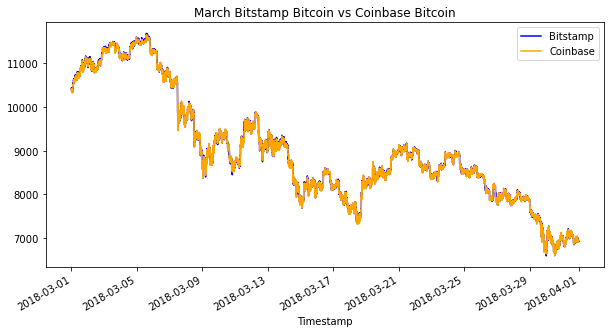

In [22]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_df['Close'].loc['2018-03-01':'2018-04-01'].plot(legend=True, title= "March Bitstamp Bitcoin vs Coinbase Bitcoin", figsize= (20,10), color="blue", label="Bitstamp")
coinbase_df['Close'].loc['2018-03-01':'2018-04-01'].plot(legend=True, figsize= (10,5), color="orange", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** The degree of spread changed as time progressed. There was more spread in January, closer to 2018-01-29, between the two bitcoin trading platforms. The spread was much tighter in March between the two bitcoin trading platforms.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamp/Coinbase Bitcoin Price Action Jan 28,2018'}, xlabel='Timestamp'>

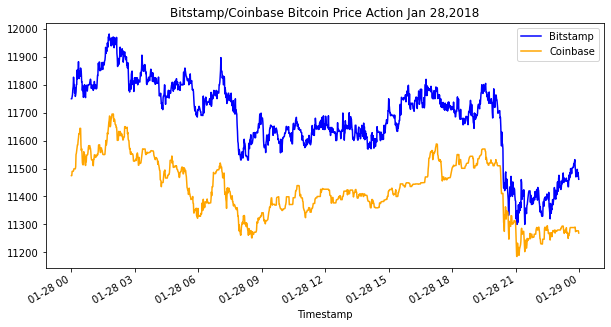

In [42]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_df['Close'].loc['2018-01-28'].plot(legend=True, figsize=(10,5),title="Bitstamp/Coinbase Bitcoin Price Action Jan 28,2018", color="blue", label="Bitstamp")
coinbase_df['Close'].loc['2018-01-28'].plot(legend=True, figsize=(10,5), color="orange", label="Coinbase")

In [33]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_sliced['2018-01-28'] - bitstamp_sliced['2018-01-28']
# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1436.000000
mean     -247.552326
std        68.343472
min      -439.010000
25%      -290.925000
50%      -251.180000
75%      -210.022500
max       -55.030000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Early Arbitrage Summary'}>

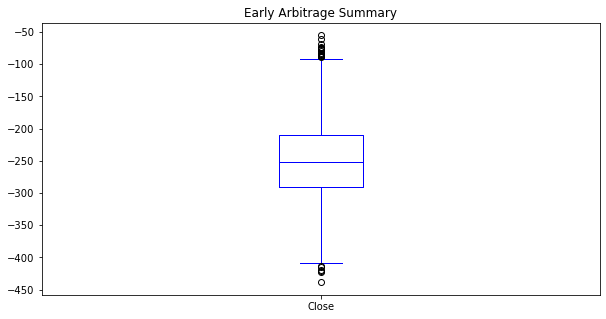

In [34]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind="box", figsize=(10,5), title="Early Arbitrage Summary", color="blue")

<AxesSubplot:title={'center':'Bitstamp/Coinbase Bitcoin Price Action Feb 15, 2018'}, xlabel='Timestamp'>

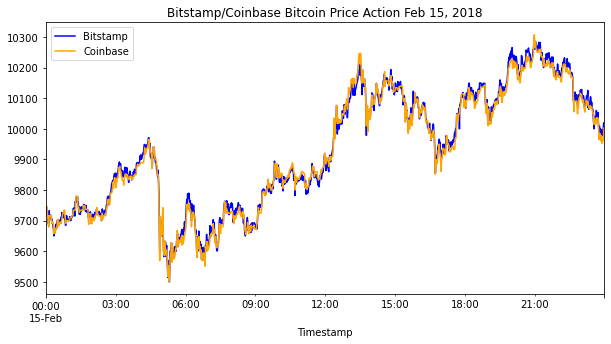

In [35]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-02-15'].plot(legend=True, figsize=(10,5), title= "Bitstamp/Coinbase Bitcoin Price Action Feb 15, 2018", color="blue", label="Bitstamp")
coinbase_sliced.loc['2018-02-15'].plot(legend=True, figsize=(10,5), color="orange", label="Coinbase")

In [37]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced.loc['2018-02-15'] - bitstamp_sliced.loc['2018-02-15']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1440.000000
mean       -5.760007
std        14.908671
min       -55.470000
25%       -16.217500
50%        -6.960000
75%         3.995000
max        48.800000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Middle Arbitrage Summary'}>

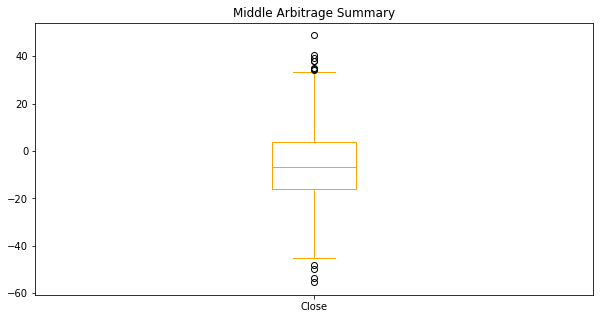

In [38]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box', figsize=(10,5), title= "Middle Arbitrage Summary", color="orange")

<AxesSubplot:title={'center':'Bitstamp/Coinbase Bitcoin Price Action Mar 20, 2018'}, xlabel='Timestamp'>

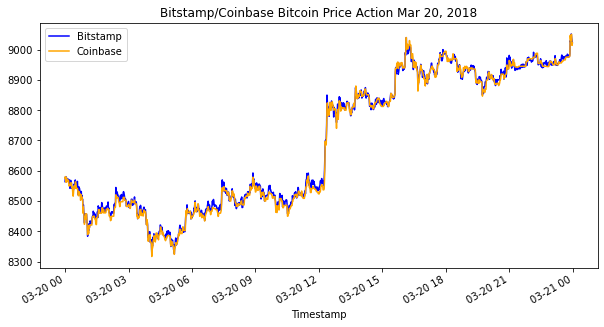

In [46]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-03-20'].plot(legend=True, figsize=(10,5), title= "Bitstamp/Coinbase Bitcoin Price Action Mar 20, 2018", color="blue", label="Bitstamp")
coinbase_sliced.loc['2018-03-20'].plot(legend=True, figsize=(10,5), color="orange", label="Coinbase")

In [48]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_sliced['2018-03-20'] - bitstamp_sliced['2018-03-20']




# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1432.000000
mean       -4.572556
std         9.269393
min       -59.950000
25%       -10.962500
50%        -4.825000
75%         1.477500
max        27.930000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Late Arbitrage Summary'}>

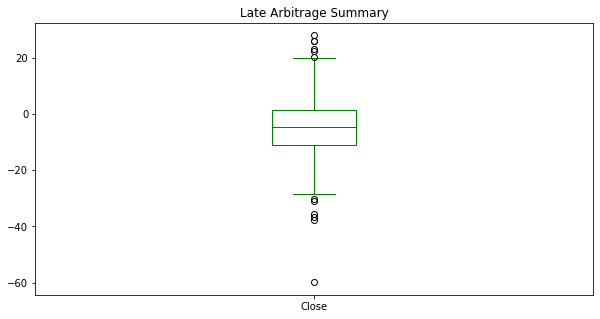

In [49]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box', figsize=(10,5), title= "Late Arbitrage Summary", color="green")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [80]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early=bitstamp_sliced.loc['2018-01-28'] - coinbase_sliced.loc['2018-01-28']
arbitrage_spread_middle=bitstamp_sliced.loc['2018-02-15'] - coinbase_sliced.loc['2018-02-15']
arbitrage_spread_late=bitstamp_sliced.loc['2018-03-20'] - coinbase_sliced.loc['2018-03-20']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
print(arbitrage_spread_early[arbitrage_spread_early>0].describe())
print(arbitrage_spread_middle[arbitrage_spread_middle>0].describe())
print(arbitrage_spread_late[arbitrage_spread_late>0].describe())



count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64
count    970.000000
mean      13.963979
std        9.337793
min        0.010000
25%        6.715000
50%       12.735000
75%       19.667500
max       55.470000
Name: Close, dtype: float64
count    980.000000
mean       9.290367
std        6.611229
min        0.010000
25%        4.240000
50%        8.440000
75%       13.165000
max       59.950000
Name: Close, dtype: float64


#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [115]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
positive_spread_early = arbitrage_spread_early[arbitrage_spread_early>0]
spread_return_early= positive_spread_early/coinbase_sliced['2018-01-28']

positive_spread_middle = arbitrage_spread_middle[arbitrage_spread_middle>0]
spread_return_middle= positive_spread_middle/coinbase_sliced['2018-02-15']

positive_spread_late = arbitrage_spread_late[arbitrage_spread_late>0]
spread_return_late= positive_spread_late/coinbase_sliced['2018-03-20']

# Review the spread return DataFrame
print(spread_return_early)
print(spread_return_middle)
print(spread_return_late)

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
                         ...   
2018-01-28 23:55:00    0.019518
2018-01-28 23:56:00    0.017302
2018-01-28 23:57:00    0.018510
2018-01-28 23:58:00    0.017303
2018-01-28 23:59:00    0.017094
Name: Close, Length: 1440, dtype: float64
Timestamp
2018-02-15 00:00:00         NaN
2018-02-15 00:01:00         NaN
2018-02-15 00:02:00         NaN
2018-02-15 00:03:00         NaN
2018-02-15 00:04:00         NaN
                         ...   
2018-02-15 23:55:00    0.001554
2018-02-15 23:56:00    0.002714
2018-02-15 23:57:00    0.004448
2018-02-15 23:58:00    0.002838
2018-02-15 23:59:00    0.000300
Name: Close, Length: 1440, dtype: float64
Timestamp
2018-03-20 00:00:00         NaN
2018-03-20 00:01:00         NaN
2018-03-20 00:02:00    0.001401
2018-03-20 00:03:00    0.001960
2018-03-20 00:04:00         NaN
                      

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [116]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = positive_spread_early[positive_spread_early>0.01]
profitable_trades_middle = positive_spread_middle[positive_spread_middle>0.01]
profitable_trades_late = positive_spread_late[positive_spread_late>0.01]

# Review the first five profitable trades
profitable_trades_early.head()
profitable_trades_middle.head()
profitable_trades_late.head()

Timestamp
2018-03-20 00:02:00    12.00
2018-03-20 00:03:00    16.78
2018-03-20 00:05:00     8.02
2018-03-20 00:08:00     3.45
2018-03-20 00:09:00     0.98
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [117]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()



count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

In [118]:
profitable_trades_middle.describe()

count    970.000000
mean      13.963979
std        9.337793
min        0.010000
25%        6.715000
50%       12.735000
75%       19.667500
max       55.470000
Name: Close, dtype: float64

In [119]:
profitable_trades_late.describe()

count    980.000000
mean       9.290367
std        6.611229
min        0.010000
25%        4.240000
50%        8.440000
75%       13.165000
max       59.950000
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [128]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_per_trade_early = profitable_trades_early * positive_spread_early

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_per_trade_early.dropna()

# View the early profit DataFrame
profit_per_trade_early.head()

Timestamp
2018-01-28 00:00:00    75834.1444
2018-01-28 00:01:00    75625.0000
2018-01-28 00:02:00    72237.3129
2018-01-28 00:03:00    75641.5009
2018-01-28 00:04:00    86588.9476
Name: Close, dtype: float64

In [129]:
profit_per_trade_middle = profitable_trades_middle * positive_spread_middle
profit_per_trade_middle = profit_per_trade_middle.dropna()
profit_per_trade_middle.head()


Timestamp
2018-02-15 00:06:00      9.0000
2018-02-15 00:07:00    110.8809
2018-02-15 00:08:00    251.5396
2018-02-15 00:09:00     69.3889
2018-02-15 00:10:00      4.0401
Name: Close, dtype: float64

In [130]:
profit_per_trade_late = profitable_trades_late * positive_spread_late
profit_per_trade_late = profit_per_trade_late.dropna()
profit_per_trade_late.head()


Timestamp
2018-03-20 00:02:00    144.0000
2018-03-20 00:03:00    281.5684
2018-03-20 00:05:00     64.3204
2018-03-20 00:08:00     11.9025
2018-03-20 00:09:00      0.9604
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE

<AxesSubplot:title={'center':'Profit per trade Jan 18,2018'}, xlabel='Timestamp'>

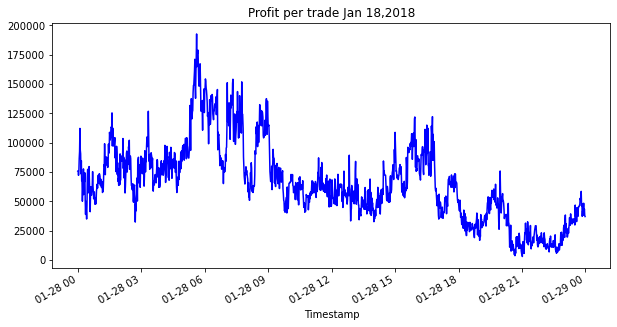

In [132]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize=(10,5),title="Profit per trade Jan 18,2018", color="blue")

<AxesSubplot:title={'center':'Profit per trade Feb 15,2018'}, xlabel='Timestamp'>

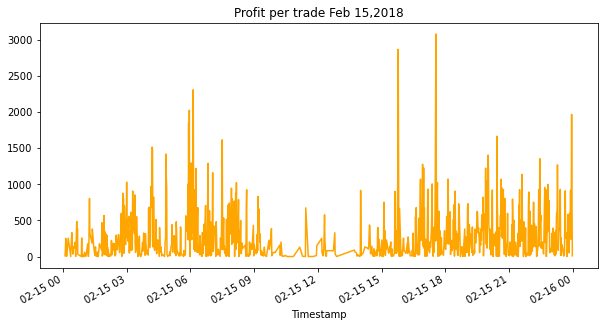

In [133]:
profit_per_trade_middle.plot(figsize=(10,5),title="Profit per trade Feb 15,2018", color="orange")

<AxesSubplot:title={'center':'Profit per trade Mar 20,2018'}, xlabel='Timestamp'>

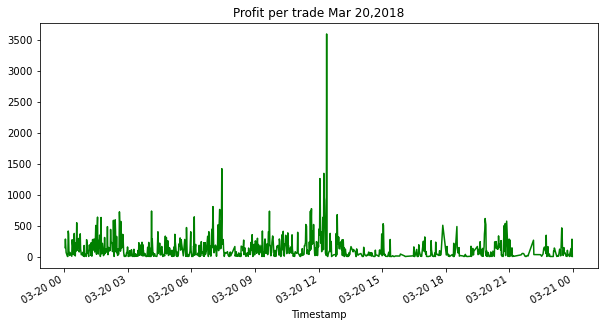

In [134]:
profit_per_trade_late.plot(figsize=(10,5),title="Profit per trade Mar 20,2018", color="green")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [137]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
arbitrage_profit_early = profit_per_trade_early.sum()
arbitrage_profit_early

94703814.55040005

In [136]:
arbitrage_proft_middle= profit_per_trade_middle.sum()
arbitrage_proft_middle

273634.2853999996

In [135]:
arbitrage_profit_late= profit_per_trade_late.sum()
arbitrage_profit_late

127375.17759999952

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [140]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_early

Timestamp
2018-01-28 00:00:00    7.583414e+04
2018-01-28 00:01:00    1.514591e+05
2018-01-28 00:02:00    2.236965e+05
2018-01-28 00:03:00    2.993380e+05
2018-01-28 00:04:00    3.859269e+05
                           ...     
2018-01-28 23:55:00    9.454700e+07
2018-01-28 23:56:00    9.458506e+07
2018-01-28 23:57:00    9.462864e+07
2018-01-28 23:58:00    9.466671e+07
2018-01-28 23:59:00    9.470381e+07
Name: Close, Length: 1436, dtype: float64

In [141]:
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_middle

Timestamp
2018-02-15 00:06:00         9.0000
2018-02-15 00:07:00       119.8809
2018-02-15 00:08:00       371.4205
2018-02-15 00:09:00       440.8094
2018-02-15 00:10:00       444.8495
                          ...     
2018-02-15 23:55:00    270125.5718
2018-02-15 23:56:00    270856.7334
2018-02-15 23:57:00    272820.9958
2018-02-15 23:58:00    273625.2854
2018-02-15 23:59:00    273634.2854
Name: Close, Length: 970, dtype: float64

In [142]:
cumulative_profit_late = profit_per_trade_late.cumsum()
cumulative_profit_late

Timestamp
2018-03-20 00:02:00       144.0000
2018-03-20 00:03:00       425.5684
2018-03-20 00:05:00       489.8888
2018-03-20 00:08:00       501.7913
2018-03-20 00:09:00       502.7517
                          ...     
2018-03-20 23:52:00    126967.3726
2018-03-20 23:55:00    127091.4722
2018-03-20 23:56:00    127094.2611
2018-03-20 23:58:00    127374.4887
2018-03-20 23:59:00    127375.1776
Name: Close, Length: 980, dtype: float64

<AxesSubplot:title={'center':'Cumulative Profits Jan 18,2018'}, xlabel='Timestamp'>

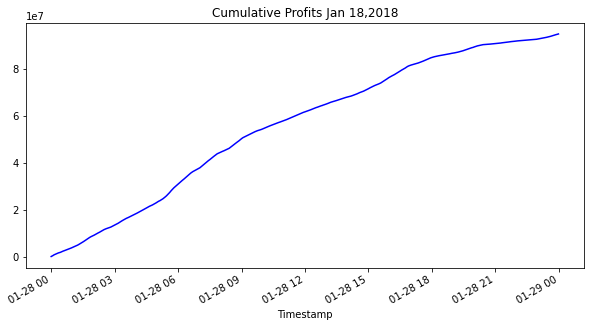

In [143]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(10,5), title="Cumulative Profits Jan 18,2018", color='blue')

<AxesSubplot:title={'center':'Cumulative Profits Feb 15,2018'}, xlabel='Timestamp'>

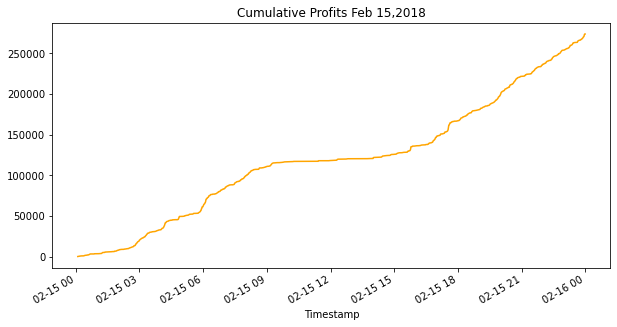

In [144]:
cumulative_profit_middle.plot(figsize=(10,5), title="Cumulative Profits Feb 15,2018", color='orange')

<AxesSubplot:title={'center':'Cumulative Profits Mar 20,2018'}, xlabel='Timestamp'>

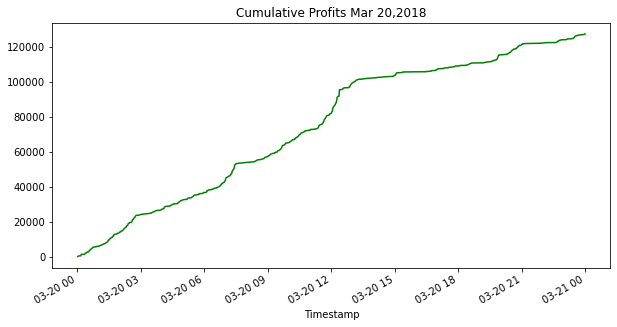

In [145]:
cumulative_profit_late.plot(figsize=(10,5), title="Cumulative Profits Mar 20,2018", color='green')

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** From analyzing the data I can conclude that profit per trade on each date we analyzed increased throughout the day as time passed. The profit margins decreased a from the early date chosen to the late date chosen, in this case it was a day from January to the date in March. The mean of profitable trades decreased by over 200 from January to March indicating that potential for arbitrage trades decreased. Although there are still possible arbitrage trade for profits , they have decreased drastically.